In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
batch_size = 32
channels = 3
EPOCHS  = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle = True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size =batch_size)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [7]:
68*32

2176

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[201. 196. 202.]
  [199. 194. 200.]
  [198. 193. 199.]
  ...
  [167. 165. 176.]
  [171. 169. 180.]
  [179. 177. 188.]]

 [[204. 199. 205.]
  [202. 197. 203.]
  [199. 194. 200.]
  ...
  [168. 166. 177.]
  [172. 170. 181.]
  [180. 178. 189.]]

 [[202. 197. 203.]
  [200. 195. 201.]
  [199. 194. 200.]
  ...
  [170. 168. 179.]
  [174. 172. 183.]
  [181. 179. 190.]]

 ...

 [[197. 196. 201.]
  [194. 193. 198.]
  [198. 197. 202.]
  ...
  [129. 123. 135.]
  [143. 137. 151.]
  [118. 112. 126.]]

 [[205. 204. 209.]
  [198. 197. 202.]
  [188. 187. 192.]
  ...
  [154. 148. 160.]
  [173. 167. 181.]
  [142. 136. 150.]]

 [[191. 190. 195.]
  [191. 190. 195.]
  [169. 168. 173.]
  ...
  [143. 137. 149.]
  [143. 137. 151.]
  [125. 119. 133.]]]


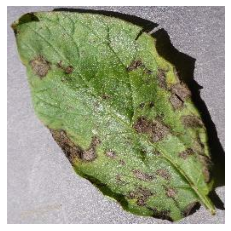

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")


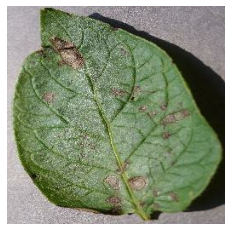

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.axis("off")


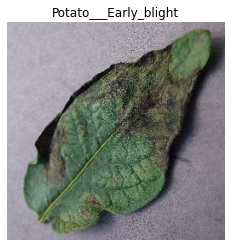

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

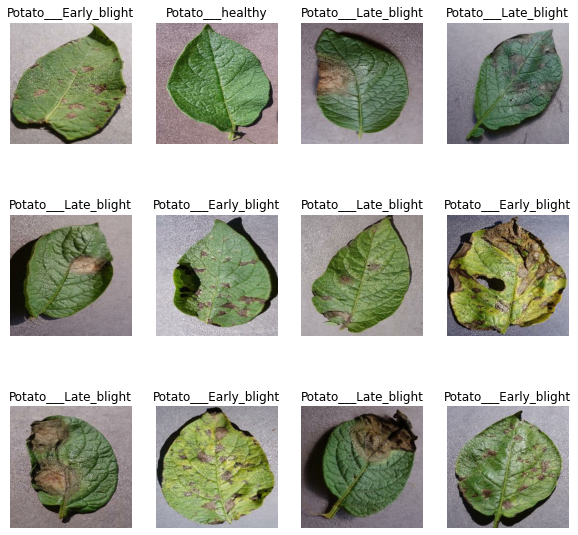

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split = 0.1,test_split=0.1,shuffle=True,shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed =12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape = (batch_size,IMAGE_SIZE,IMAGE_SIZE,channels)
n_classes = 3

model = models.Sequential([
     resize_and_rescale,
     data_argumentation,
     
     layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
    
     layers.Flatten(), 
     
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax')
     
 ])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

In [20]:
len(train_ds)

54

In [21]:
histroy = model.fit(train_ds,epochs=70,batch_size = 80,verbose=1,validation_data =val_ds)

Epoch 1/70
54/54 [==============================] - 6s 107ms/step - loss: 0.9065 - accuracy: 0.4988 - val_loss: 0.7865 - val_accuracy: 0.7240
Epoch 2/70
54/54 [==============================] - 5s 96ms/step - loss: 0.7031 - accuracy: 0.6684 - val_loss: 0.5063 - val_accuracy: 0.7976
Epoch 3/70
54/54 [==============================] - 5s 97ms/step - loss: 0.5062 - accuracy: 0.7749 - val_loss: 0.4877 - val_accuracy: 0.7812
Epoch 4/70
54/54 [==============================] - 5s 97ms/step - loss: 0.3445 - accuracy: 0.8545 - val_loss: 0.2529 - val_accuracy: 0.9167
Epoch 5/70
54/54 [==============================] - 5s 97ms/step - loss: 0.2935 - accuracy: 0.8744 - val_loss: 0.3017 - val_accuracy: 0.9010
Epoch 6/70
54/54 [==============================] - 5s 98ms/step - loss: 0.2240 - accuracy: 0.9131 - val_loss: 0.1996 - val_accuracy: 0.9427
Epoch 7/70
54/54 [==============================] - 5s 99ms/step - loss: 0.1965 - accuracy: 0.9231 - val_loss: 0.1994 - val_accuracy: 0.9115
Epoch 8/70
5

In [22]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 0s 16ms/step - loss: 0.0040 - accuracy: 1.0000


In [23]:
scores

[0.00400139344856143, 1.0]

In [26]:
histroy

In [27]:
histroy.params

{'verbose': 1, 'epochs': 70, 'steps': 54}

In [28]:
histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
histroy.history['accuracy']

[0.4988262951374054,
 0.6684272289276123,
 0.7748842835426331,
 0.8544601202011108,
 0.8744131326675415,
 0.9131455421447754,
 0.9231220483779907,
 0.908450722694397,
 0.92136150598526,
 0.9360328912734985,
 0.9454225301742554,
 0.934272289276123,
 0.9424882531166077,
 0.9624413251876831,
 0.9448356628417969,
 0.9612675905227661,
 0.9671361446380615,
 0.9542253613471985,
 0.9612675905227661,
 0.9659624695777893,
 0.9675925970077515,
 0.9694835543632507,
 0.9747652411460876,
 0.9759389758110046,
 0.9771126508712769,
 0.9780092835426331,
 0.9814814925193787,
 0.9835680723190308,
 0.9884259104728699,
 0.9595070481300354,
 0.9841549396514893,
 0.9832175970077515,
 0.9507042169570923,
 0.9832175970077515,
 0.9876760840415955,
 0.9853286147117615,
 0.98591548204422,
 0.9797453880310059,
 0.9820601940155029,
 0.9835680723190308,
 0.9917840361595154,
 0.9865023493766785,
 0.9823943376541138,
 0.9911971688270569,
 0.9888497591018677,
 0.9964788556098938,
 0.9861111044883728,
 0.98591548204422,


In [29]:
histroy.history['loss']

[0.9114213585853577,
 0.8066136837005615,
 0.4436507523059845,
 0.3301905691623688,
 0.2539854049682617,
 0.259446382522583,
 0.2113730013370514,
 0.18375544250011444,
 0.16623206436634064,
 0.19825370609760284,
 0.1720755249261856,
 0.12382648140192032,
 0.15028859674930573,
 0.12116914242506027,
 0.10616762191057205,
 0.09377015382051468,
 0.1035875752568245,
 0.13692766427993774,
 0.09335348755121231,
 0.10286150872707367,
 0.106800876557827,
 0.08022183179855347,
 0.09319034218788147,
 0.07858020067214966,
 0.08851323276758194,
 0.09131671488285065,
 0.04928658530116081,
 0.05300990119576454,
 0.06647662818431854,
 0.0888846144080162,
 0.08496110886335373,
 0.06284794956445694,
 0.06927556544542313,
 0.07042256742715836,
 0.03408219665288925,
 0.049854714423418045,
 0.04541480913758278,
 0.03452105075120926,
 0.0319305844604969,
 0.038897618651390076,
 0.06434812396764755,
 0.033679548650979996,
 0.05218760296702385,
 0.07270736247301102,
 0.04968632012605667,
 0.0537797212600708,


In [30]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']

loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

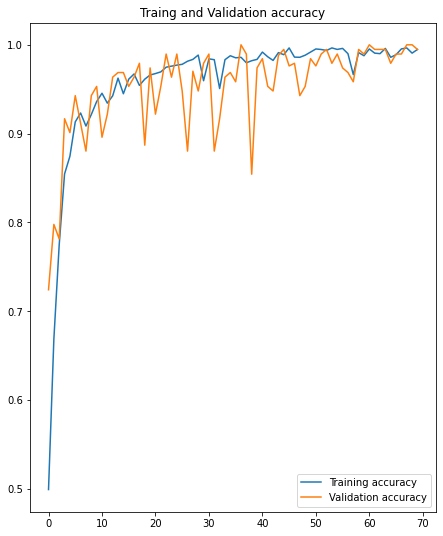

In [31]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

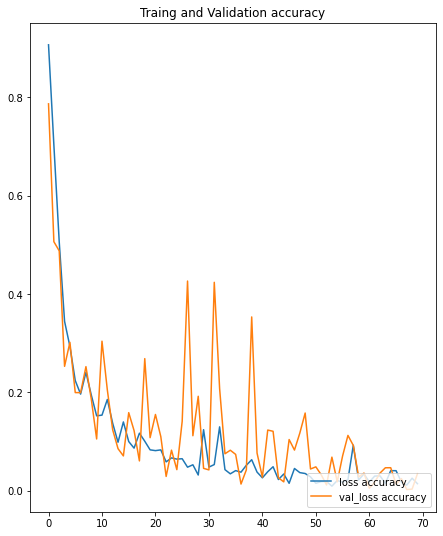

In [32]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

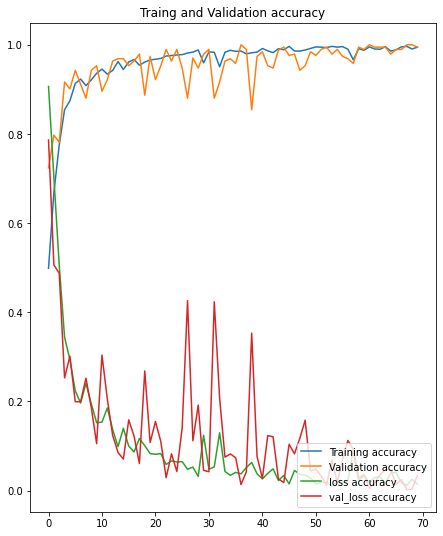

In [33]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

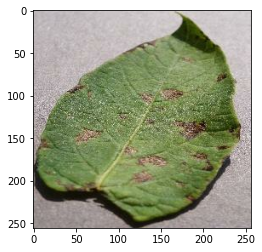

In [34]:
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

In [35]:
import numpy as np

first image to predict
Actual label:  Potato___Early_blight
Prediction label:  Potato___Early_blight


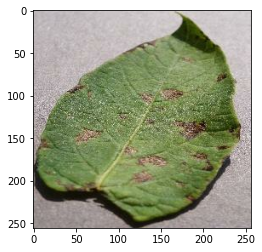

In [37]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Prediction label: ",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

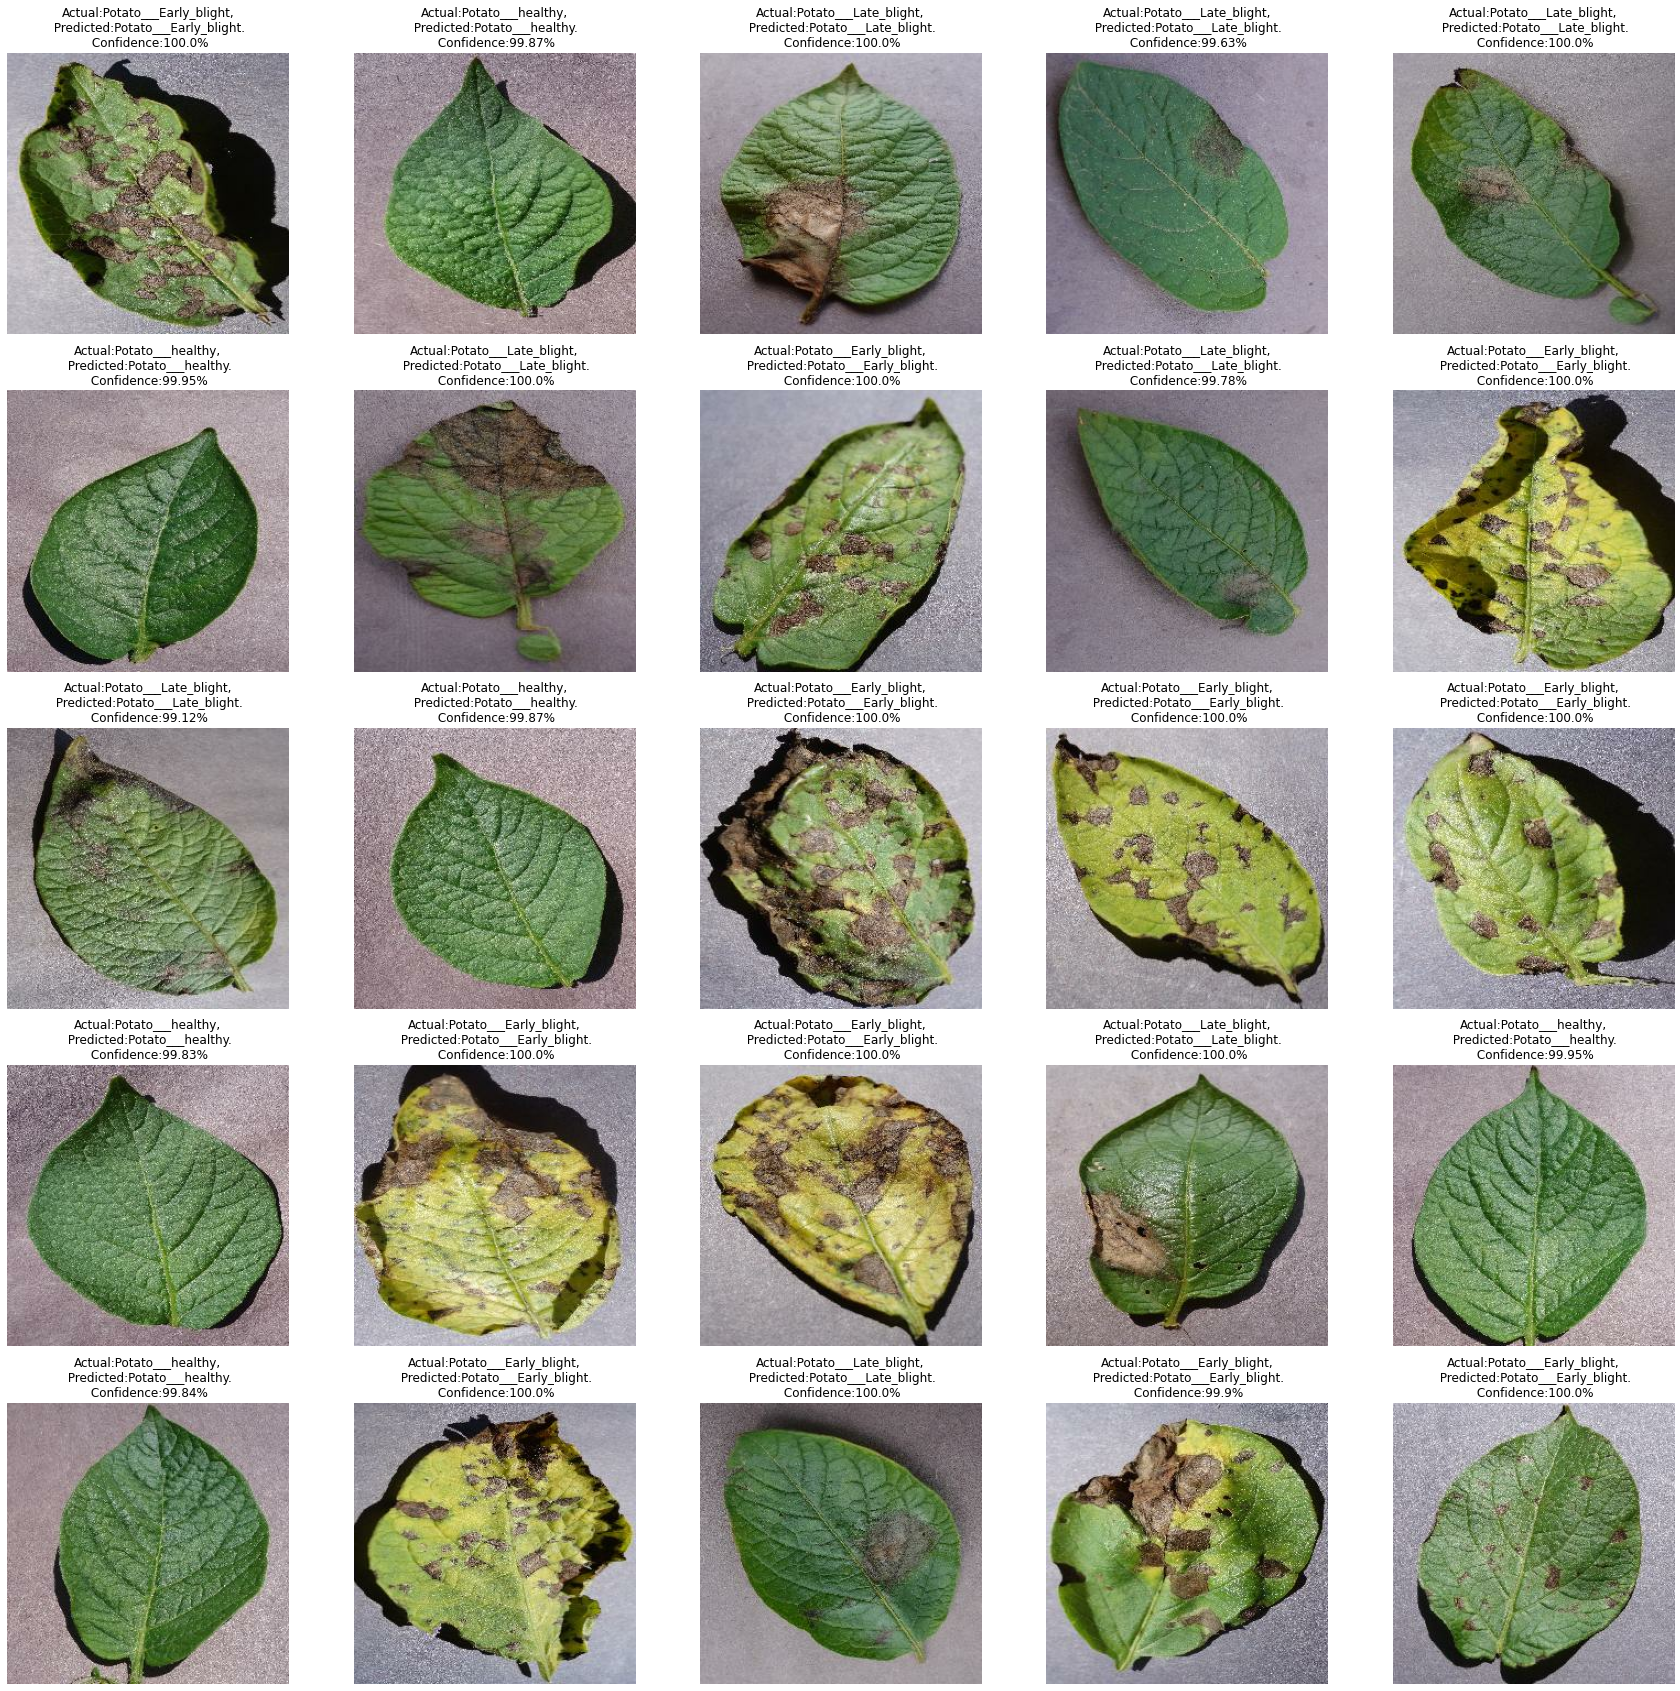

In [39]:
plt.figure(figsize=(30,30))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis('off')
        

In [39]:
import os
model_version = max([int(i) for i in os.listdir("./models") + [0]]) + 1
model.save(f"./models/{model_version}")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/6\assets
